**ANN Model building for Diesel vechicles**

In [ ]:
#importing the required libraries
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#Defining ANN function
def ann(raw,TARGET_NAME):

    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    def build_and_compile_model():
        model = keras.Sequential([
           normalizer,
           layers.Dense(64, activation='relu'),
           layers.Dense(64, activation='relu'),
           layers.Dense(1)
        ])

        model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001))
        return model

    ann_model = build_and_compile_model()
    ann_model.summary()

    history = ann_model.fit(
        train_features,
        train_labels,
        validation_split=0.2,
        verbose=1, epochs=100)

    pred=ann_model.predict(test_features)

    prediction=pd.DataFrame(pred)

    prediction=prediction.rename(columns={0:'Prediction'})


    results=pd.DataFrame(test_features.values,columns=['Distance', 'TimeNeeded_in_Seconds', 'primary', 'secondary_link',
           'NotFound', 'tertiary_link', 'trunk', 'service', 'residential',
           'tertiary', 'track', 'primary_link', 'secondary', 'unclassified',
           'motorway_link', 'motorway', 'Change_In_Elevation', 'precipIntensity',
           'temperature', 'visibility', 'Speed_Ratio', 'Jam_Factor'])

    results['actual']=pd.DataFrame(test_labels.values)
    results['prediction']=pd.DataFrame(prediction.values)
    results['abbLoass']=results['actual'].values-results['prediction'].values
    print('Training Using Diesel Data Completed')
    return ann_model,results,history

**ANN Model building for Electric vechicles**

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
def ann1(raw,TARGET_NAME):

    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)

    r= test_features.copy();
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(train_features)
    train_features=pd.DataFrame(scaled,columns=list(train_features.columns))
    scaled = scaler.fit_transform(test_features)
    #inscaled = scaler.inverse_transform(test_features)
    test_features=pd.DataFrame(scaled,columns=list(test_features.columns))
    #intest_features=pd.DataFrame(inscaled,columns=list(test_features.columns))
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    def build_and_compile_model():
        model = keras.Sequential([
           layers.Dense(64, activation='relu'),
           layers.Dense(64, activation='relu'),
           layers.Dense(1)
        ])

        model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.01))
        return model

    ann_model = build_and_compile_model()
    #ann_model.summary()

    history = ann_model.fit(
        train_features,
        train_labels,
        validation_split=0.2,
        verbose=1, epochs=100)

    pred=ann_model.predict(test_features)

    prediction=pd.DataFrame(pred)

    prediction=prediction.rename(columns={0:'Prediction'})


    results=pd.DataFrame(r.values,columns=list(r.columns))

    results['actual']=pd.DataFrame(test_labels.values)
    results['prediction']=pd.DataFrame(prediction.values)
    results['abbLoass']=results['actual'].values-results['prediction'].values
    print('Training Using Electric Data Completed')
    return ann_model,results,history

2.8.0
Size of Training Data (43793, 22)
Size of Testing  Data (10948, 22)
[[2.6741196e+02 4.8456177e+01 2.7635702e-01 5.6287535e-03 0.0000000e+00
  7.9921418e-05 4.5669349e-03 3.9732382e-02 1.6480945e-01 4.4904452e-02
  1.2559084e-04 2.0265788e-02 2.6027012e-01 2.1829972e-02 3.0941054e-02
  1.6155561e-02 3.7246305e-01 6.4489676e-04 7.6169968e+01 4.6450195e+00
  9.1981488e-01 2.7965212e-01]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 22)               45        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                          

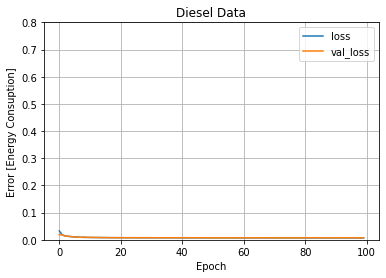

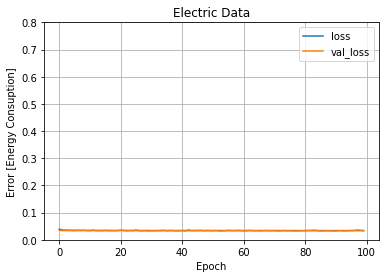

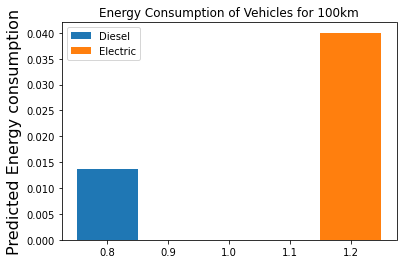

In [ ]:
import math
import time
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(tf.__version__)

Diesel = '/content/Diesel_Vehicles_Final_Training_Samples.csv'

Electric= '/content/Electric_Vehicles_Final_Training_Samples.csv'

TARGET_NAME = 'Energy_Consumed'

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.8])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Energy Consuption]')
    plt.legend()
    plt.grid(True)


## Diesel Data
ann_model,results,history=ann(Diesel,TARGET_NAME)

results.to_csv('dieselVehiclesDataResults.csv')

## Electric Data
ann_modelE,resultsE,historyE=ann1(Electric,TARGET_NAME)

resultsE.to_csv('ElectricVehiclesDataResults.csv')

actual1=results['actual']
predicted1=results['prediction']
MAE=mean_absolute_error(actual1,predicted1)
MSE=mean_squared_error(actual1,predicted1)
RMSE=np.sqrt(mean_squared_error(actual1,predicted1))

print("MAE  Diesel vehicle",MAE)
print("MSE  Diesel vehicle",MSE)
print("RMSE Diesel vehicle",RMSE)

actual2=resultsE['actual']
predicted2=resultsE['prediction']

MAE1=mean_absolute_error(actual2,predicted2)
MSE1=mean_squared_error(actual2,predicted2)
RMSE1=np.sqrt(mean_squared_error(actual2,predicted2))

print("MAE  Electric vehicle",MAE1)
print("MSE  Electric vehicle",MSE1)
print("RMSE Electric vehicle",RMSE1)
pd.DataFrame(np.array([[MAE,MSE,RMSE],[MAE1,MSE1,RMSE1]]),columns=['MAE','MSE','RMSE'])


val=pd.DataFrame(np.array([[MAE,MSE,RMSE],[MAE1,MSE1,RMSE1]]),columns=['MAE','MSE','RMSE'])
f=pd.DataFrame(['Diesel','Electric'])
tab=pd.concat([f,val],axis=1)
tab.to_csv('ModelErrorResults.csv')

dis=sum(results['Distance'])
ene=sum(results['prediction'])
Edis=sum(resultsE['Distance'])
Eene=sum(resultsE['prediction'])

EnergyConsumed100kmDiesel=(ene/dis)*100
EnergyConsumed100kmElectric=(Eene/Edis)*100
s1=results.sort_values(by="Distance",ascending=True)
s2=resultsE.sort_values(by="Distance",ascending=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(1)
plt.title('Diesel Data')
plot_loss(history)
plt.savefig('DieselVehicleTrainingError.jpg')
plt.figure(2)
plt.title('Electric Data')
plot_loss(historyE)
plt.savefig('ElectricVehicleTrainingError.jpg')
# create data
x = 1
y1 = [EnergyConsumed100kmDiesel]
y2 = [EnergyConsumed100kmElectric]
width = 0.1
plt.figure(3)
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.legend(['Diesel','Electric'])
#plt.xlabel('Distance of the modal', fontsize=16)
plt.ylabel('Predicted Energy consumption', fontsize=16)
plt.title('Energy Consumption of Vehicles for 100km')
plt.savefig('Efficiency.jpg')
plt.show()